In [1]:
import os
os.chdir('..')

In [2]:
from torchvision.datasets import MNIST
import torch
import torch.nn as nn
import torchvision.transforms as TF
from eXNN.InnerNeuralTopology import api

In [3]:
train_ds = MNIST(root='./.cache', train=True, download=True, transform=TF.ToTensor()) 
test_ds = MNIST(root='./.cache', train=False, download=False, transform=TF.ToTensor())

C:\ProgramData\Anaconda3\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [4]:
train_dl = torch.utils.data.DataLoader(train_ds, batch_size=36, shuffle=True)
test_dl = torch.utils.data.DataLoader(test_ds, batch_size=36, shuffle=False)

In [5]:
import torch.nn as nn
class SimpleNN(nn.Module):
    def __init__(self, input_dim, output_dim, hidden_dim, leaky_coef=0.1):
        super(SimpleNN, self).__init__()
        
        self.layer1 = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.LeakyReLU(leaky_coef)
        )
        self.layer2 = nn.Sequential(
            nn.Linear(hidden_dim, hidden_dim),
            nn.LeakyReLU(leaky_coef)
        )
        self.layer3 = nn.Sequential(
            nn.Linear(hidden_dim, output_dim)#,
            #nn.Sigmoid()
        )
    
    def forward(self, x):
        x = nn.Flatten()(x)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        return x

In [6]:
num_classes = 10
model = SimpleNN(28*28, num_classes, 64)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [7]:
data = torch.stack([test_ds[i][0] for i in range(100)])
res_unnorm_before = api.NetworkHomologies(model, data, layers = ['layer2'], hom_type = "standard", coefs_type = "2")

In [8]:
n_epochs = 20
loss_fn = nn.CrossEntropyLoss()
for epoch in list(range(n_epochs)):
    for imgs, lbls in train_dl:
        optimizer.zero_grad()
        out = model(imgs)
        loss = loss_fn(out, lbls)
        loss.backward()
        optimizer.step()
    print("Epoch {} loss: {}".format(epoch, loss.item()))

Epoch 0 loss: 0.1818467527627945
Epoch 1 loss: 0.0348515659570694
Epoch 2 loss: 0.055760979652404785
Epoch 3 loss: 0.19302596151828766
Epoch 4 loss: 0.06088097393512726
Epoch 5 loss: 0.011163261719048023
Epoch 6 loss: 0.016706837341189384
Epoch 7 loss: 0.12026318907737732
Epoch 8 loss: 0.0041767000220716
Epoch 9 loss: 0.00704461382701993
Epoch 10 loss: 0.0001738993014441803
Epoch 11 loss: 0.003325033700093627
Epoch 12 loss: 0.00017342368664685637
Epoch 13 loss: 0.011458609253168106
Epoch 14 loss: 0.061536386609077454
Epoch 15 loss: 0.0010659132385626435
Epoch 16 loss: 6.29111600574106e-05
Epoch 17 loss: 0.0023900249507278204
Epoch 18 loss: 0.044998157769441605
Epoch 19 loss: 0.0016281820135191083


In [9]:
data = torch.stack([test_ds[i][0] for i in range(100)])
res_unnorm_after = api.NetworkHomologies(model, data, layers = ['layer2'], hom_type = "standard", coefs_type = "2")

In [10]:
num_classes = 20
model = SimpleNN(28*28, num_classes, 64)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay = 0.01)

n_epochs = 20
loss_fn = nn.CrossEntropyLoss()
for epoch in list(range(n_epochs)):
    for imgs, lbls in train_dl:
        optimizer.zero_grad()
        out = model(imgs)
        loss = loss_fn(out, lbls)
        loss.backward()
        optimizer.step()
    print("Epoch {} loss: {}".format(epoch, loss.item()))

Epoch 0 loss: 0.38132670521736145
Epoch 1 loss: 0.23823799192905426
Epoch 2 loss: 0.14199964702129364
Epoch 3 loss: 0.2566467523574829
Epoch 4 loss: 0.34684517979621887
Epoch 5 loss: 0.09718009829521179
Epoch 6 loss: 0.21725988388061523
Epoch 7 loss: 0.15713442862033844
Epoch 8 loss: 0.1687999963760376
Epoch 9 loss: 0.2254984825849533
Epoch 10 loss: 0.27371761202812195
Epoch 11 loss: 0.11111251264810562
Epoch 12 loss: 0.2517441213130951
Epoch 13 loss: 0.20030929148197174
Epoch 14 loss: 0.11384321004152298
Epoch 15 loss: 0.14429588615894318
Epoch 16 loss: 0.43001464009284973
Epoch 17 loss: 0.10627931356430054
Epoch 18 loss: 0.14384765923023224
Epoch 19 loss: 0.12838228046894073


In [11]:
data = torch.stack([test_ds[i][0] for i in range(100)])
res_norm_after = api.NetworkHomologies(model, data, layers = ['layer2'], hom_type = "standard", coefs_type = "2")

In [12]:
num_classes = 20
model = SimpleNN(28*28, num_classes, 64)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay = 10)

n_epochs = 20
loss_fn = nn.CrossEntropyLoss()
for epoch in list(range(n_epochs)):
    for imgs, lbls in train_dl:
        optimizer.zero_grad()
        out = model(imgs)
        loss = loss_fn(out, lbls)
        loss.backward()
        optimizer.step()
    print("Epoch {} loss: {}".format(epoch, loss.item()))

Epoch 0 loss: 2.9907264709472656
Epoch 1 loss: 2.9906322956085205
Epoch 2 loss: 2.990679979324341
Epoch 3 loss: 2.9907820224761963
Epoch 4 loss: 2.9908132553100586
Epoch 5 loss: 2.991191864013672
Epoch 6 loss: 2.9906914234161377
Epoch 7 loss: 2.9917633533477783
Epoch 8 loss: 2.990560531616211
Epoch 9 loss: 2.9909372329711914
Epoch 10 loss: 2.9908273220062256
Epoch 11 loss: 2.9900853633880615
Epoch 12 loss: 2.9901514053344727
Epoch 13 loss: 2.9906680583953857
Epoch 14 loss: 2.9907190799713135
Epoch 15 loss: 2.9911515712738037
Epoch 16 loss: 2.9904730319976807
Epoch 17 loss: 2.9907705783843994
Epoch 18 loss: 2.990163803100586
Epoch 19 loss: 2.9909746646881104


In [13]:
data = torch.stack([test_ds[i][0] for i in range(100)])
res_norm_destructive = api.NetworkHomologies(model, data, layers = ['layer2'], hom_type = "standard", coefs_type = "2")

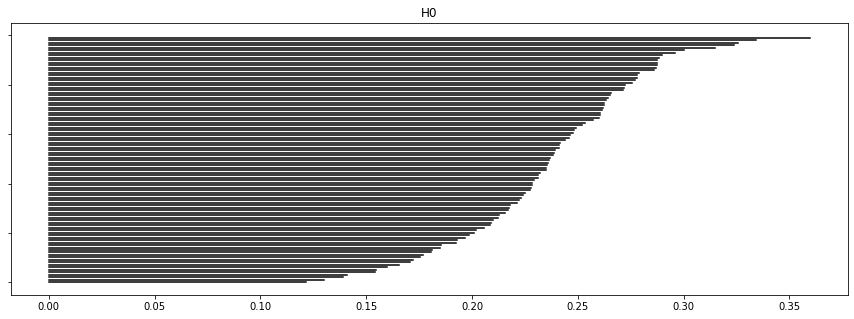

In [14]:
res_unnorm_before["layer2"]

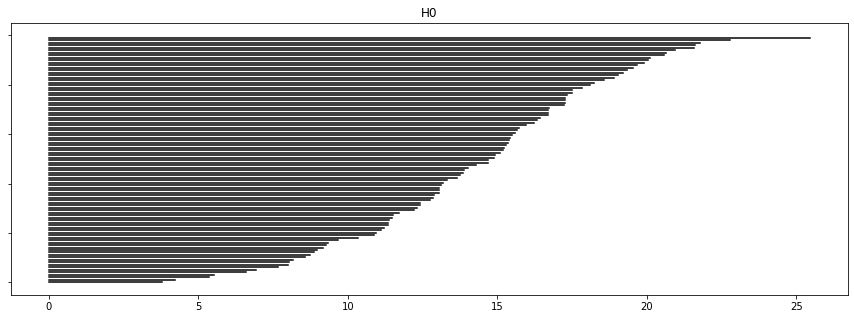

In [15]:
res_unnorm_after["layer2"]

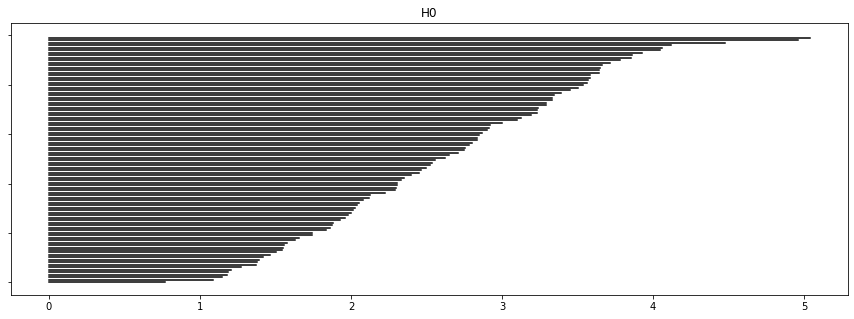

In [16]:
res_norm_after["layer2"]

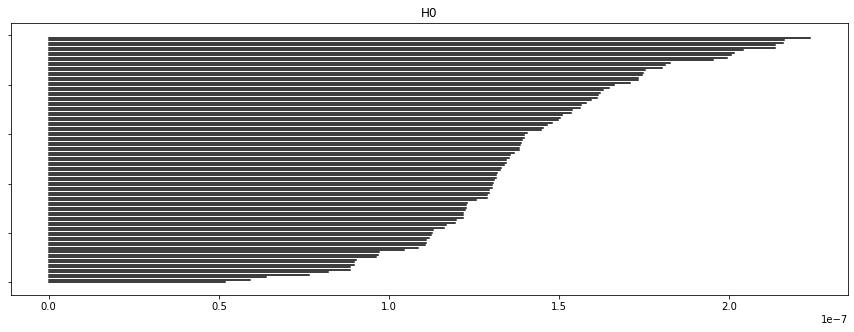

In [17]:
res_norm_destructive["layer2"]